<a href="https://colab.research.google.com/github/roopalJazz/AIML/blob/master/Decision_Tree_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to understand Decision Tree.

#### Decision Tree

As the name says all about it, it is a tree which helps us by assisting us in decision-making. Used
for both classification and regression, it is a very basic and important predictive learning algorithm.

    1. It is different from others because it works intuitively i.e., taking decisions one-by-one.
    2. Non-Parametric: Fast and efficient.

It consists of nodes which have parent-child relationships

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree. In ZeroR model there is no predictor, in OneR model we try to find the single best predictor, naive Bayesian includes all predictors using Bayes' rule and the independence assumptions between predictors but decision tree includes all predictors with the dependence assumptions between predictors.

In this experiment we will be using a Zoo dataset. The "type" attribute appears to be the class attribute. Here is a breakdown of which animals are in which type:


1 -- Mammals (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf 

2 -- Birds (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren 

3 -- Reptiles (5) pitviper, seasnake, slowworm, tortoise, tuatara 

4 -- Aquatic (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna 

5 -- Amphibians (4) frog, frog, newt, toad 

6 -- Insects (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp 

7 -- Arthropods (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm



### Keywords

* Numpy
* Pandas
* ID3 Algorithm
* Train, Test Split

#### Expected Time : 60 min

### Setup Steps

#### Importing Required Packages

In [0]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz

#### Loading Dataset

In [0]:
#Import all columns omitting the fist which consists the names of the animals
dataset = pd.read_csv('Zoo_New.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We don't use animal name for classification because it is just a string stating the 
#name and it won't provide any extra information for classification in this context
dataset=dataset.drop('animal_name',axis=1)

In [8]:
np.unique(dataset['class'].values)

array([1, 2, 3, 4, 5, 6, 7])

In [9]:
dataset['class']

0      1
1      1
2      4
3      1
4      1
5      1
6      1
7      4
8      4
9      1
10     1
11     2
12     4
13     7
14     7
15     7
16     2
17     1
18     4
19     1
20     2
21     2
22     1
23     2
24     6
25     5
26     5
27     1
28     1
29     1
      ..
71     2
72     7
73     4
74     1
75     1
76     3
77     7
78     2
79     2
80     3
81     7
82     4
83     2
84     1
85     7
86     4
87     2
88     6
89     5
90     3
91     3
92     4
93     1
94     1
95     2
96     1
97     6
98     1
99     7
100    2
Name: class, Length: 101, dtype: int64

In [10]:
dataset.shape

(101, 17)

#### Splitting the datasets into train and test

In [0]:
def train_test_split(dataset):
    training_data = dataset.iloc[:80].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 


In [0]:
training_data = training_data.values

In [0]:
testing_data = testing_data.values

#### Predict the class of test data

In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier()

In [0]:
clf = clf.fit(training_data[:,:16],training_data[:,16])

In [0]:
pred = clf.predict(testing_data[:,:16])

In [0]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(testing_data[:,16], pred)

0.7619047619047619

In [20]:
import os
save_dot = "output" + ".dot"
save_png = "output"+ ".png"
graph = graphviz.Source(export_graphviz(clf, out_file=save_dot, filled = True,feature_names=(list(dataset.columns))[:-1]))
os.system("dot -T png -o " + save_png + " " + save_dot)

0

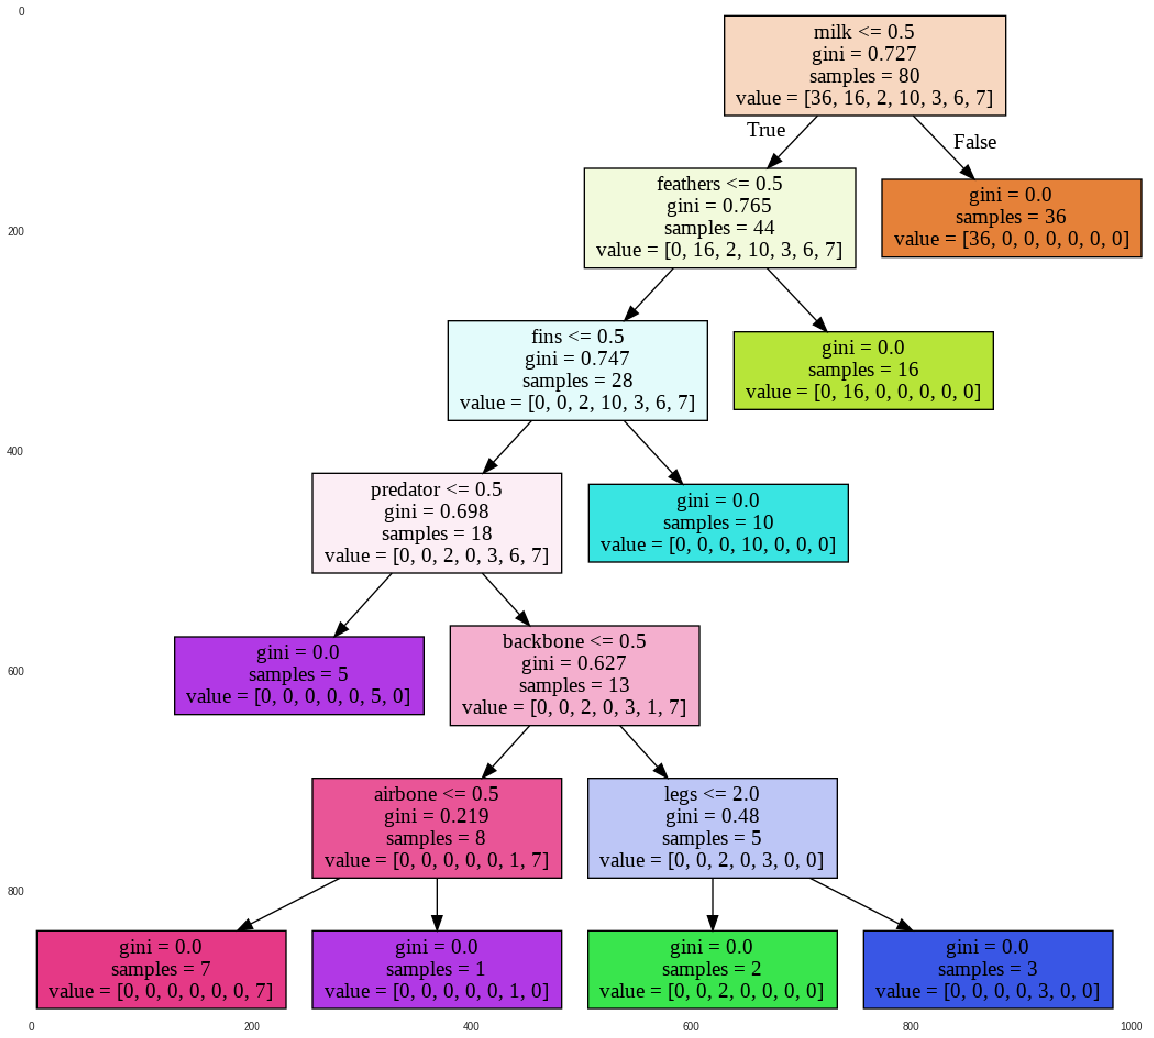

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(plt.imread(save_png)),
plt.show()

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.



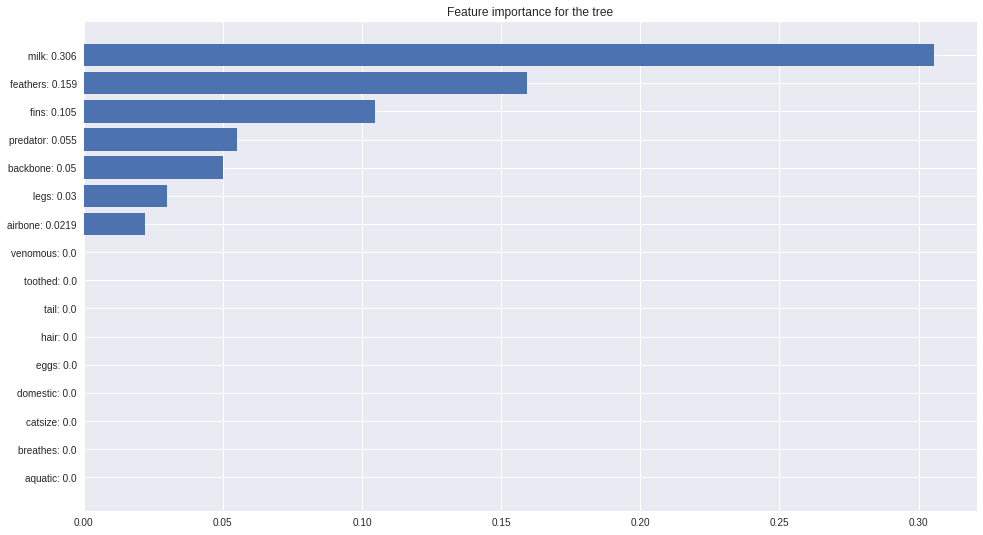

In [22]:

def feature_importance_chart(clf, classifier_name, feature_names):
    sorted_feature_importances, sorted_feature_names = (
        zip(*sorted(zip(clf.tree_.compute_feature_importances(normalize=False), feature_names)))
    )
    plt.figure(figsize=(16, 9))
    plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances)
    plt.yticks(
        range(len(sorted_feature_importances)),
        ["{}: {:.3}".format(a, b) for a, b in zip(sorted_feature_names, sorted_feature_importances)]
    )
    plt.title("Feature importance for the tree")
    plt.show()

feature_importance_chart(clf, "simple tree", list(dataset.columns))

#### Exercise 1

Change the train and test split ratio and observe the change in accuracy 

In [25]:
#### Your code here
def train_test_split_diff(dataset):
    training_data = dataset.iloc[:85].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[85:].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split_diff(dataset)[0]
testing_data = train_test_split_diff(dataset)[1] 
training_data = training_data.values
testing_data = testing_data.values
clf = clf.fit(training_data[:,:16],training_data[:,16])
pred = clf.predict(testing_data[:,:16])
accuracy_score(testing_data[:,16], pred)

0.875

#### Exercise 2

Randomly sample 50 % of the data to build decision trees and plot the feature importance graph.

Write briefly about how random sampling has affected the feature importance in the trained decision tree classifier

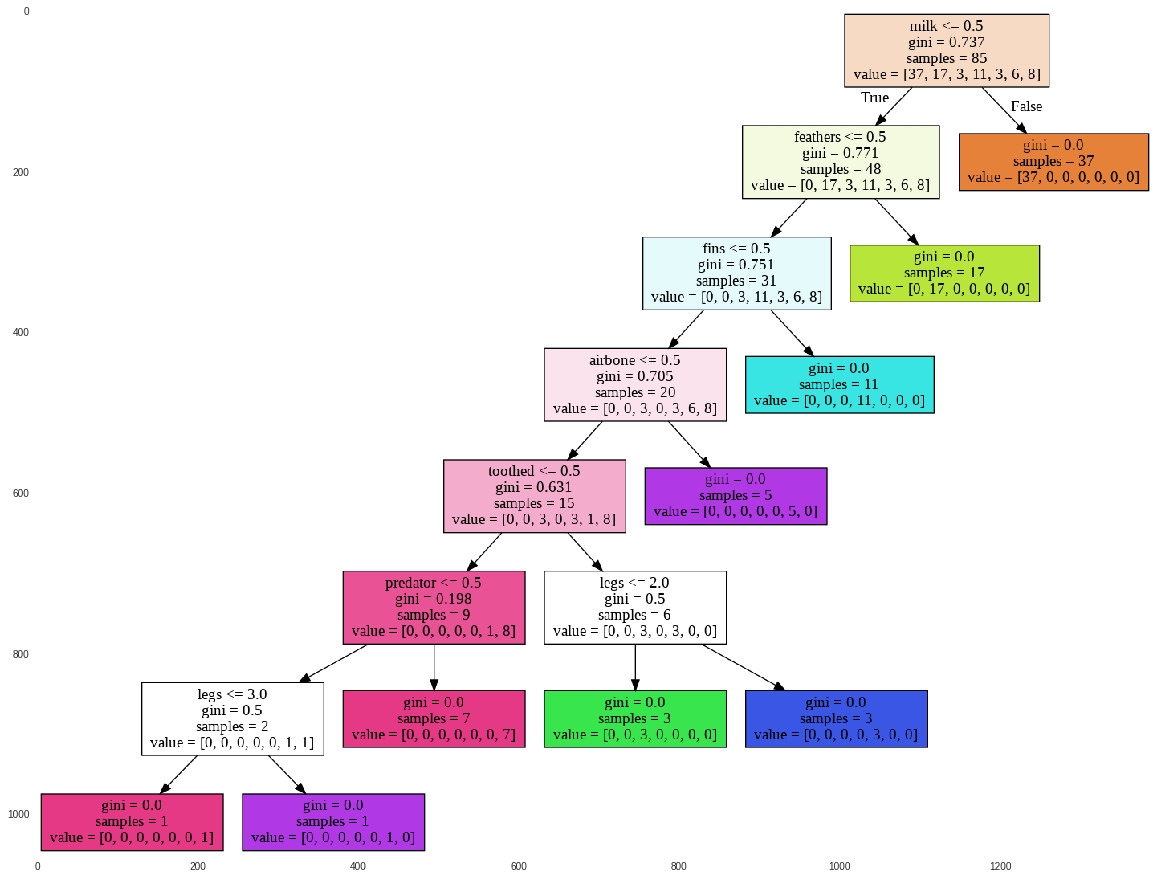

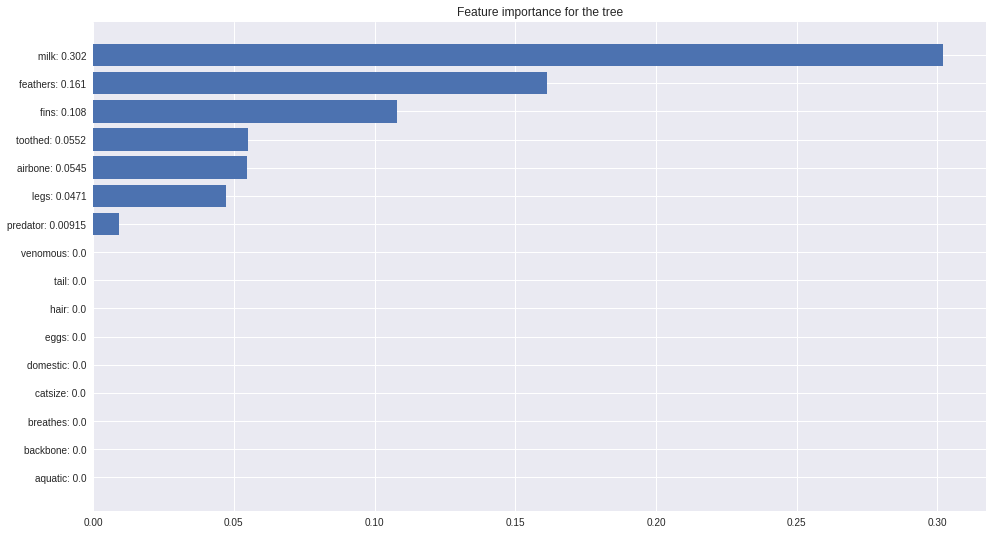

In [28]:
#### Your code here 
save_dot = "output" + ".dot"
save_png = "output"+ ".png"
graph = graphviz.Source(export_graphviz(clf, out_file=save_dot, filled = True,feature_names=(list(dataset.columns))[:-1]))
os.system("dot -T png -o " + save_png + " " + save_dot)
plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(plt.imread(save_png)),
plt.show()
feature_importance_chart(clf, "simple tree", list(dataset.columns))


### Please answer the questions below to complete the experiment:

In [0]:
#@title For this dataset, if the train-test split is changed to 90 -10, the feature importance of "milk" would be lower when compared to the feature importance of the same with 80 - 20 split. True or False { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True" #@param ["True","False"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "N/A" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]